In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


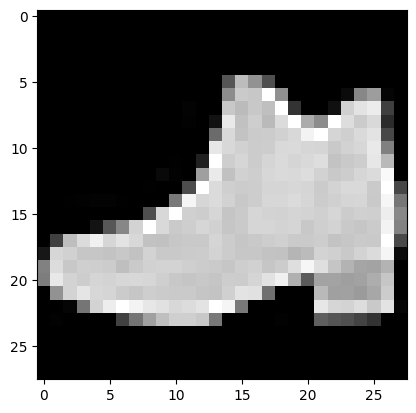

In [3]:
plt.imshow(x_train[15], cmap='grey')

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10)
])

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - loss: 0.6494 - sparse_categorical_accuracy: 0.7786 - val_loss: 0.4534 - val_sparse_categorical_accuracy: 0.8405
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.4154 - val_sparse_categorical_accuracy: 0.8474
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 0.3594 - sparse_categorical_accuracy: 0.8710 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8640
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - loss: 0.3366 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.3588 - val_sparse_categorical_accuracy: 0.8702
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 0.3172 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.3548 - val_sparse_categorical_accuracy: 0.8743
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 0.2982 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.3570 - val_sparse_categoric

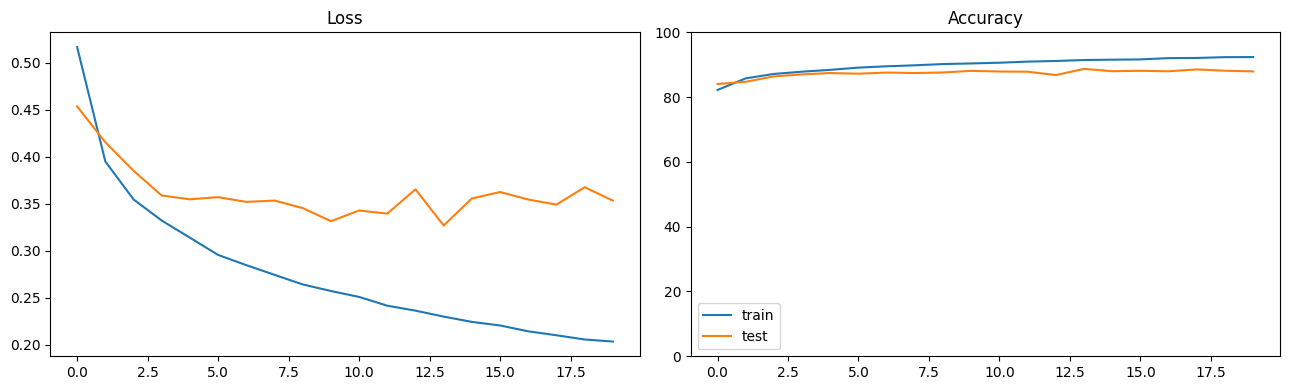

In [9]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
plot_history(history)

### Drop out

Drop_out: {0.8}


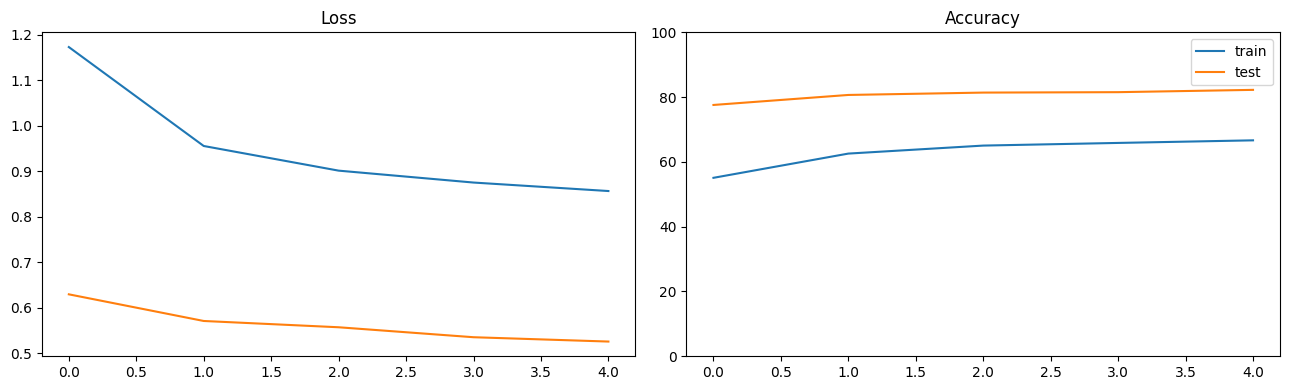

In [11]:
for drop_out in [0.8]:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(drop_out),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    print(f'Drop_out:', {drop_out})
    plot_history(history)

In [12]:
history.history

{'loss': [1.173316240310669,
  0.9556071162223816,
  0.9013637900352478,
  0.8751614093780518,
  0.8564903736114502],
 'sparse_categorical_accuracy': [0.5509166717529297,
  0.6256666779518127,
  0.6504166722297668,
  0.6586166620254517,
  0.6665999889373779],
 'val_loss': [0.629188060760498,
  0.5705286860466003,
  0.5567038059234619,
  0.5347844958305359,
  0.5252575278282166],
 'val_sparse_categorical_accuracy': [0.7757999897003174,
  0.8066999912261963,
  0.8140000104904175,
  0.8152999877929688,
  0.8223999738693237]}